In [1]:
# Celda 1: Setup
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Agregar src al path
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.models.recommender import PlayerRecommender
from src.utils.data_loader import DataLoader
from src.utils.visualizations import plot_radar_chart, plot_comparison_radar
from src.config import POSITION_FEATURES

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
loader = DataLoader()
summary = loader.get_summary()

print("RESUMEN DEL DATASET\n")
print(f"Total de jugadores: {summary['total_players']}")
print(f"Total de equipos: {summary['total_teams']}")
print(f"Total de temporadas: {summary['total_seasons']}")
print(f"Minutos promedio: {summary['avg_minutes']:.0f}\n")

print("Jugadores por posición:")
for pos, count in summary['positions'].items():
    print(f"  {pos}: {count}")

Cargando datos desde: /workspaces/Hackathon-America/data/processed/all_players_processed.csv
Cargados 1667 registros
RESUMEN DEL DATASET

Total de jugadores: 1667
Total de equipos: 18
Total de temporadas: 4
Minutos promedio: 1737

Jugadores por posición:
  MED: 1084
  DEF: 305
  FWD: 162
  GK: 116


In [5]:
recommender = PlayerRecommender(data_loader=loader)
recommender.fit(min_minutes=500)

✅ Sistema entrenado con 1611 jugadores
📊 Varianza explicada por PCA: 87.49%


In [6]:
player_name = "Álvaro Fidalgo Fernández"

try:
    similar = recommender.find_similar_players(
        player_name=player_name,
        same_position_only=True,
        top_n=10,
        exclude_same_team=True
    )
    
    print(f"\n TOP 10 JUGADORES SIMILARES:\n")
    print(similar[['player_name', 'team_name', 'final_score', 'similarity_score']].to_string(index=False))
    
except ValueError as e:
    print(e)


 TOP 10 JUGADORES SIMILARES:

                     player_name     team_name  final_score  similarity_score
           José Antonio Paradela        Necaxa     0.833567          0.863276
         Juan Francisco Brunetta Santos Laguna     0.794332          0.846107
  Carlos Alberto Rodríguez Gómez     Cruz Azul     0.788884          0.803866
   Jean David Meneses Villarroel        Toluca     0.779027          0.795477
        César Saúl Huerta Valera    Pumas UNAM     0.772674          0.766708
Leonardo Cecilio Fernández López        Toluca     0.771805          0.796313
        Maximiliano Eduardo Meza     Monterrey     0.767810          0.805512
    Bryan Eduardo Garnica Cortéz        Necaxa     0.762576          0.784106
      Pablo Edson Barrera Acosta     Querétaro     0.755800          0.773592
        Maximiliano Eduardo Meza     Monterrey     0.749568          0.803374


In [7]:
player_name = "Álvaro Fidalgo Fernández"

try:
    similar = recommender.find_similar_players(
        player_name=player_name,
        same_position_only=False,
        top_n=10,
        exclude_same_team=True
    )
    
    print(f"\n TOP 10 JUGADORES SIMILARES:\n")
    print(similar[['player_name', 'team_name', 'final_score', 'similarity_score']].to_string(index=False))
    
except ValueError as e:
    print(e)


 TOP 10 JUGADORES SIMILARES:

                     player_name     team_name  final_score  similarity_score
           José Antonio Paradela        Necaxa     0.801598          0.863276
 Yeferson Julio Soteldo Martínez   Tigres UANL     0.797596          0.932733
      Kevin Nahin Álvarez Campos       Pachuca     0.790520          0.821359
         Juan Francisco Brunetta Santos Laguna     0.768039          0.846107
  Carlos Alberto Rodríguez Gómez     Cruz Azul     0.757094          0.803866
   Jean David Meneses Villarroel        Toluca     0.747531          0.795477
Leonardo Cecilio Fernández López        Toluca     0.742755          0.796313
        César Saúl Huerta Valera    Pumas UNAM     0.739892          0.766708
        Maximiliano Eduardo Meza     Monterrey     0.739735          0.805512
    Bryan Eduardo Garnica Cortéz        Necaxa     0.732638          0.784106


In [8]:
if 'similar' in locals():
    print("\nESTADÍSTICAS COMPLETAS:\n")
    display(similar)


ESTADÍSTICAS COMPLETAS:



,player_name,team_name,position_category,primary_position,player_season_minutes,final_score,similarity_score,context_score,player_season_goals_90,player_season_assists_90,player_season_np_xg_90,player_season_obv_90
0,José Antonio Paradela,Necaxa,MED,Centre Attacking Midfielder,3455.9836,0.801598,0.863276,0.657683,0.286460,0.338543,0.151753,0.283904
1,Yeferson Julio Soteldo Martínez,Tigres UANL,FWD,Left Wing,637.0000,0.797596,0.932733,0.482277,0.141287,0.282575,0.149371,0.537452
2,Kevin Nahin Álvarez Campos,Pachuca,DEF,Right Back,3730.0170,0.790520,0.821359,0.718561,0.072386,0.144771,0.062839,0.318144
3,Juan Francisco Brunetta,Santos Laguna,MED,Centre Attacking Midfielder,1800.4333,0.768039,0.846107,0.585879,0.499880,0.499880,0.248035,0.474743
4,Carlos Alberto Rodríguez Gómez,Cruz Azul,MED,Centre Defensive Midfielder,3577.3500,0.757094,0.803866,0.647959,0.000000,0.226425,0.033850,0.249776
5,Jean David Meneses Villarroel,Toluca,MED,Left Midfielder,3690.6335,0.747531,0.795477,0.635655,0.219475,0.170702,0.177412,0.213585
6,Leonardo Cecilio Fernández López,Toluca,MED,Centre Attacking Midfielder,2673.6995,0.742755,0.796313,0.617784,0.336612,0.403935,0.116678,0.366059
7,César Saúl Huerta Valera,Pumas UNAM,MED,Left Midfielder,3476.7668,0.739892,0.766708,0.677322,0.284747,0.232975,0.210372,0.306686
8,Maximiliano Eduardo Meza,Monterrey,MED,Right Midfielder,2834.4165,0.739735,0.805512,0.586255,0.158763,0.158763,0.132692,0.295803
9,Bryan Eduardo Garnica Cortéz,Necaxa,MED,Right Midfielder,3314.5664,0.732638,0.784106,0.612547,0.081459,0.135764,0.084598,0.247801


In [9]:
#Ahora buscamos sin un jugador pivote, sino con estadisticas buscadas por el DT
#Posiciones: FWD,MED,DEF,GKP

print("Buscando delanteros con perfil ofensivo en este caso:\n")

forwards = recommender.recommend_by_profile(
    position='DEF',
    attacking_weight=0,
    defensive_weight=0.7,
    passing_weight=0.3,
    top_n=10,
    min_minutes=500
)

print(forwards[['player_name', 'team_name', 'profile_score', 'attacking_score']].to_string(index=False))

Buscando delanteros con perfil ofensivo en este caso:

                     player_name   team_name  profile_score  attacking_score
             Mateo Chávez García Guadalajara          145.5        -0.536434
             Mateo Chávez García Guadalajara          124.6        -0.565019
   Javier Ignacio Aquino Carmona Tigres UANL          111.0        -0.567726
  Diego Armando Barbosa Zaragoza     Tijuana          107.9        -0.228426
       Yairo Yesid Moreno Berrío     Pachuca          103.6         0.581127
      Pablo Nicolás Ortíz Orozco   Querétaro          103.0         0.243158
  Diego Armando Barbosa Zaragoza       Atlas           99.8         0.634674
  Diego Armando Barbosa Zaragoza      Toluca           96.2        -0.531161
      Robert Ismael Ergas Moreno  Pumas UNAM           92.2         0.223572
Alberto Joshimar Acosta Alvarado      Juárez           90.3        -0.603900


In [10]:
forwards

,player_name,team_name,primary_position,player_season_minutes,profile_score,attacking_score,defensive_score,passing_score,player_season_goals_90,player_season_assists_90,player_season_tackles_90,player_season_obv_90
0,Mateo Chávez García,Guadalajara,Left Back,826.44995,145.5,-0.536434,2.020157,0.137459,0.000000,0.000000,4.682679,0.268882
1,Mateo Chávez García,Guadalajara,Left Back,2027.76650,124.6,-0.565019,1.679813,0.234030,0.000000,0.177535,4.305230,0.249360
2,Javier Ignacio Aquino Carmona,Tigres UANL,Left Wing Back,3914.03320,111.0,-0.567726,1.470031,0.270195,0.000000,0.091977,3.242180,0.287669
3,Diego Armando Barbosa Zaragoza,Tijuana,Right Back,2428.73340,107.9,-0.228426,1.147867,0.919759,0.000000,0.074113,4.113255,0.311750
4,Yairo Yesid Moreno Berrío,Pachuca,Left Back,1629.88340,103.6,0.581127,1.472890,0.015266,0.165656,0.000000,3.368339,0.296627
5,Pablo Nicolás Ortíz Orozco,Querétaro,Left Back,744.81670,103.0,0.243158,1.644045,-0.402971,0.120835,0.120835,2.658372,0.356671
6,Diego Armando Barbosa Zaragoza,Atlas,Right Back,2927.83370,99.8,0.634674,1.110750,0.735384,0.092218,0.092218,3.319861,0.315854
7,Diego Armando Barbosa Zaragoza,Toluca,Right Back,1652.14990,96.2,-0.531161,1.593672,-0.512630,0.000000,0.054474,4.357958,0.168354
8,Robert Ismael Ergas Moreno,Pumas UNAM,Left Back,1196.18350,92.2,0.223572,0.615131,1.638022,0.000000,0.075239,3.009572,0.383024
9,Alberto Joshimar Acosta Alvarado,Juárez,Left Wing Back,1291.56680,90.3,-0.603900,1.395940,-0.246097,0.000000,0.000000,3.623506,0.239287


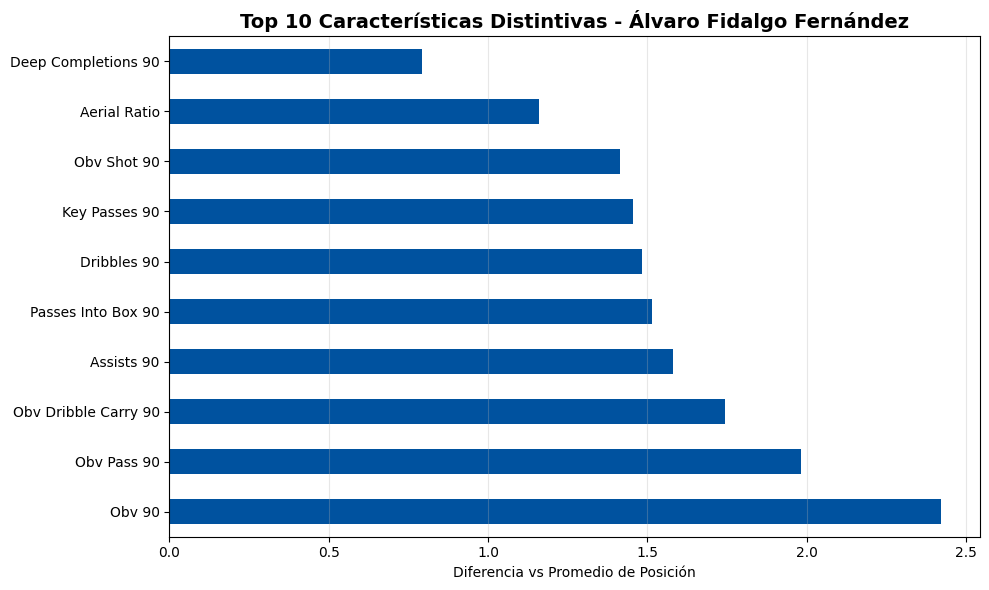

In [11]:
#Aqui podemos ver las 10 estadisticas mas destacadas del jugador

player = "Álvaro Fidalgo Fernández"

try:
    importance = recommender.get_feature_importance(player, top_n=10)
    
    plt.figure(figsize=(10, 6))
    importance.plot(kind='barh', color='#00529F')
    plt.title(f'Top 10 Características Distintivas - {player}', fontsize=14, fontweight='bold')
    plt.xlabel('Diferencia vs Promedio de Posición')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
except ValueError as e:
    print(e)

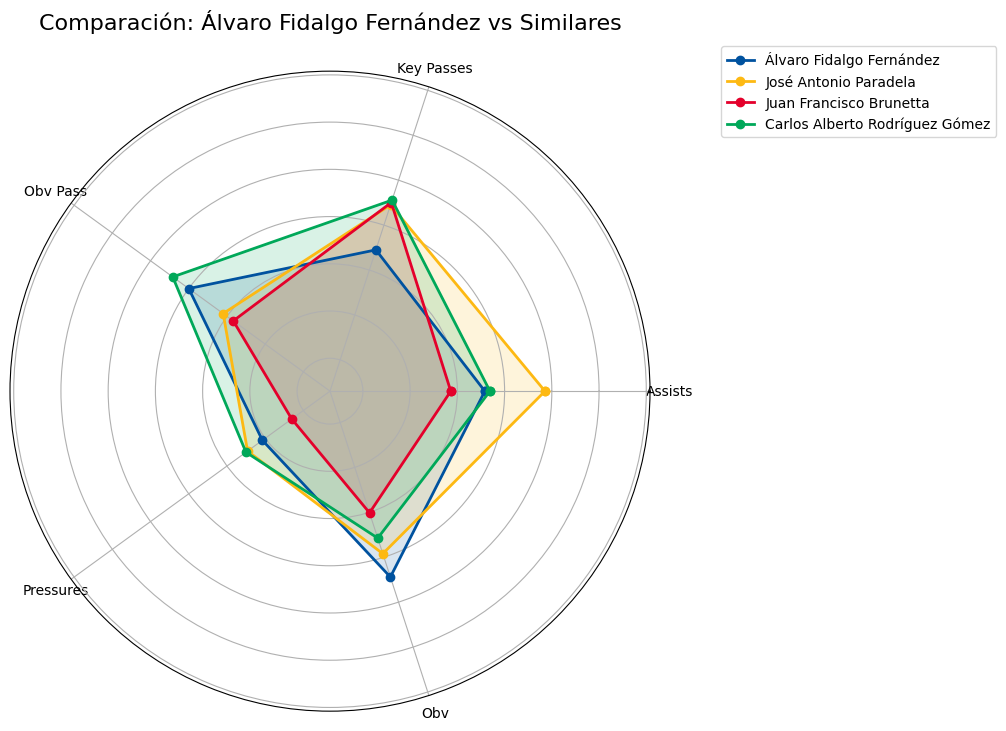

In [12]:
original = player

try:
    similar = recommender.find_similar_players(original, top_n=3)
    
    # Jugadores a comparar
    players_to_compare = [original] + similar['player_name'].tolist()
    
    # Features según posición
    position = loader.get_player_by_name(original).iloc[0]['position_category']
    features = POSITION_FEATURES[position]
    
    # Crear radar chart
    players_data = loader.df[loader.df['player_name'].isin(players_to_compare)]
    
    fig = plot_comparison_radar(
        players_data=players_data,
        player_names=players_to_compare,
        features=features,
        title=f'Comparación: {original} vs Similares'
    )
    plt.show()
    
except ValueError as e:
    print(e)